In [ ]:
# Import necessary libraries
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

def load_and_process_cifar10():

    # Load the CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize the images by dividing by 255
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # Flatten the images from (32, 32, 3) to (3072,)
    x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Flatten each image to a 1D array
    x_test_flattened = x_test.reshape(x_test.shape[0], -1)  # Flatten each image to a 1D array

    # Split the training data further into training and validation sets
    x_train_flattened, x_val_flattened, y_train, y_val = train_test_split(
        x_train_flattened, y_train, test_size=0.2, random_state=42
    )

    # Return the processed data
    return x_train_flattened, y_train, x_val_flattened, y_val, x_test_flattened, y_test

# Call the function to load, process, and split the dataset
x_train_flattened, y_train, x_val_flattened, y_val, x_test_flattened, y_test = load_and_process_cifar10()

# Print the shapes of the datasets to confirm the structure
print(f"Training data shape (flattened): {x_train_flattened.shape}")  # (40000, 3072)
print(f"Training labels shape: {y_train.shape}")  # (40000, 1)
print(f"Validation data shape (flattened): {x_val_flattened.shape}")  # (10000, 3072)
print(f"Validation labels shape: {y_val.shape}")  # (10000, 1)
print(f"Test data shape (flattened): {x_test_flattened.shape}")  # (10000, 3072)
print(f"Test labels shape: {y_test.shape}")  # (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape (flattened): (40000, 3072)
Training labels shape: (40000, 1)
Validation data shape (flattened): (10000, 3072)
Validation labels shape: (10000, 1)
Test data shape (flattened): (10000, 3072)
Test labels shape: (10000, 1)


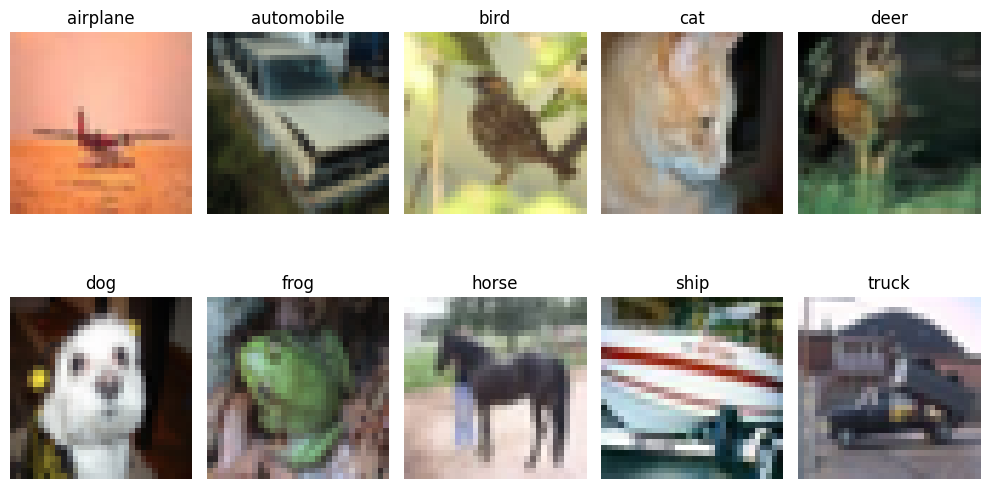

Class Distribution (Number of samples per class):
Class 0 (airplane): 5000 samples
Class 1 (automobile): 5000 samples
Class 2 (bird): 5000 samples
Class 3 (cat): 5000 samples
Class 4 (deer): 5000 samples
Class 5 (dog): 5000 samples
Class 6 (frog): 5000 samples
Class 7 (horse): 5000 samples
Class 8 (ship): 5000 samples
Class 9 (truck): 5000 samples


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from collections import Counter

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images (pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define class names in CIFAR-10 (these are fixed)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Set up the plot to display random images from each class
plt.figure(figsize=(10, 6))

# Loop through each class and plot random images
for i in range(10):  # 10 classes in CIFAR-10
    class_idx = np.where(y_train == i)[0]  # Get indices for class i
    random_sample_idx = np.random.choice(class_idx)  # Random index for this class
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns of images
    plt.imshow(x_train[random_sample_idx])  # Display the image
    plt.title(class_names[i])  # Set title as the class name (fixed, no random assignment)
    plt.axis('off')  # Turn off axis labels

# Show the plot with random images from each class
plt.tight_layout()
plt.show()

# Check the class distribution to detect imbalances
class_counts = Counter(y_train.flatten())  # Flatten y_train and count occurrences of each class
print("Class Distribution (Number of samples per class):")
for i in range(10):
    print(f"Class {i} ({class_names[i]}): {class_counts[i]} samples")

In [ ]:
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC


# Function to predict and compute accuracy and confusion matrix for SVM with Linear Kernel
def predict_svm_linear(x_train, y_train, x_test, y_test, subset_fraction=0.3, class_names=None):
    # Shuffle the training data
    x_train, y_train = shuffle(x_train, y_train, random_state=42)

    # Use a subset of the training data
    subset_size = int(x_train.shape[0] * subset_fraction)
    x_train_subset = x_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    # Flatten the images for SVM
    x_train_flat = x_train_subset.reshape(x_train_subset.shape[0], -1)
    x_test_flat = x_test.reshape(x_test.shape[0], -1)

    # Start timer
    start_time = time.time()

    # Train the SVM with a linear kernel
    svm_linear = SVC(kernel='linear')
    svm_linear.fit(x_train_flat, y_train_subset.flatten())

    # Predict on the test set
    y_pred = svm_linear.predict(x_test_flat)

    # End timer
    end_time = time.time()
    print(f"SVM Linear Kernel - Time Taken: {end_time - start_time:.2f} seconds")

    # Compute accuracy
    accuracy = accuracy_score(y_test.flatten(), y_pred)
    print(f"SVM Linear Kernel Accuracy: {accuracy * 100:.2f}%")

    # Create DataFrame for predicted vs actual labels
    results_df = pd.DataFrame({
        'True Label': y_test.flatten(),
        'Predicted Label': y_pred
    })
    print("Predictions vs True Labels:")
    print(results_df.head())  # Show the first few rows

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test.flatten(), y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("SVM Linear Kernel - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
import time
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Function to predict and compute accuracy and confusion matrix for SVM with RBF Kernel
def predict_svm_rbf(x_train, y_train, x_test, y_test, subset_fraction=0.3, class_names=None):
    # Use a subset of the training data
    subset_size = int(x_train.shape[0] * subset_fraction)
    x_train_subset = x_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    # Flatten the images for SVM
    x_train_flat = x_train_subset.reshape(x_train_subset.shape[0], -1)
    x_test_flat = x_test.reshape(x_test.shape[0], -1)

    # Start timer
    start_time = time.time()

    # Train the SVM with an RBF kernel
    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(x_train_flat, y_train_subset.flatten())

    # Predict on the test set
    y_pred = svm_rbf.predict(x_test_flat)

    # End timer
    end_time = time.time()
    print(f"SVM RBF Kernel - Time Taken: {end_time - start_time:.2f} seconds")

    # Compute accuracy
    accuracy = accuracy_score(y_test.flatten(), y_pred)
    print(f"SVM RBF Kernel Accuracy: {accuracy * 100:.2f}%")

    # Create DataFrame for predicted vs actual labels
    results_df = pd.DataFrame({
        'True Label': y_test.flatten(),
        'Predicted Label': y_pred
    })
    print("Predictions vs True Labels:")
    print(results_df.head())  # Show the first few rows

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test.flatten(), y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("SVM RBF Kernel - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to predict and compute accuracy and confusion matrix for Gaussian Naive Bayes
def predict_gaussian_nb(x_train, y_train, x_test, y_test, subset_fraction=0.3, class_names=None):
    # Shuffle the training data
    x_train, y_train = shuffle(x_train, y_train, random_state=42)
    # Use a subset of the training data
    subset_size = int(x_train.shape[0] * subset_fraction)
    x_train_subset = x_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    # Flatten the images for Naive Bayes
    x_train_flat = x_train_subset.reshape(x_train_subset.shape[0], -1)
    x_test_flat = x_test.reshape(x_test.shape[0], -1)

    # Start timer
    start_time = time.time()

    # Train the Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    gnb.fit(x_train_flat, y_train_subset.flatten())

    # Predict on the test set
    y_pred = gnb.predict(x_test_flat)

    # End timer
    end_time = time.time()
    print(f"Gaussian Naive Bayes - Time Taken: {end_time - start_time:.2f} seconds")

    # Compute accuracy
    accuracy = accuracy_score(y_test.flatten(), y_pred)
    print(f"Gaussian Naive Bayes Accuracy: {accuracy * 100:.2f}%")

    # Create DataFrame for predicted vs actual labels
    results_df = pd.DataFrame({
        'True Label': y_test.flatten(),
        'Predicted Label': y_pred
    })
    print("Predictions vs True Labels:")
    print(results_df.head())  # Show the first few rows

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test.flatten(), y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("Gaussian Naive Bayes - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to predict and compute accuracy and confusion matrix for ANN with two hidden layers
def predict_ann_with_plot_subset(x_train, y_train, x_test, y_test, subset_fraction=0.3, class_names=None):
    # Shuffle the training data
    x_train, y_train = shuffle(x_train, y_train, random_state=42)
    # Use a subset of the training data
    subset_size = int(x_train.shape[0] * subset_fraction)
    x_train_subset = x_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    # Flatten the images for ANN
    x_train_flat = x_train_subset.reshape(x_train_subset.shape[0], 32, 32, 3)  # No need to flatten for CNN-like models
    x_test_flat = x_test.reshape(x_test.shape[0], 32, 32, 3)  # No need to flatten for CNN-like models

    # One-hot encode the labels
    y_train_one_hot = to_categorical(y_train_subset, 10)
    y_test_one_hot = to_categorical(y_test, 10)

    # Build a simple ANN model with 2 hidden layers
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),  # Flatten the images
        Dense(512, activation='relu'),     # First hidden layer
        Dense(256, activation='relu'),     # Second hidden layer
        Dense(10, activation='softmax')    # Output layer with 10 classes
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Start timer
    start_time = time.time()

    # Train the model and store the history
    model.fit(x_train_flat, y_train_one_hot, epochs=100, batch_size=64, validation_data=(x_test_flat, y_test_one_hot))

    # End timer
    end_time = time.time()
    print(f"ANN - Time Taken: {end_time - start_time:.2f} seconds")

    # Predict on the test set
    y_pred = model.predict(x_test_flat)
    y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

    # Compute accuracy
    accuracy = accuracy_score(y_test.flatten(), y_pred_classes)
    print(f"ANN Accuracy: {accuracy * 100:.2f}%")

    # Create DataFrame for predicted vs actual labels
    results_df = pd.DataFrame({
        'True Label': y_test.flatten(),
        'Predicted Label': y_pred_classes
    })
    print("Predictions vs True Labels:")
    print(results_df.head())  # Show the first few rows

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test.flatten(), y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("ANN - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

SVM Linear Kernel - Time Taken: 1184.49 seconds
SVM Linear Kernel Accuracy: 34.46%
Predictions vs True Labels:
   True Label  Predicted Label
0           3                3
1           8                9
2           8                0
3           0                8
4           6                4


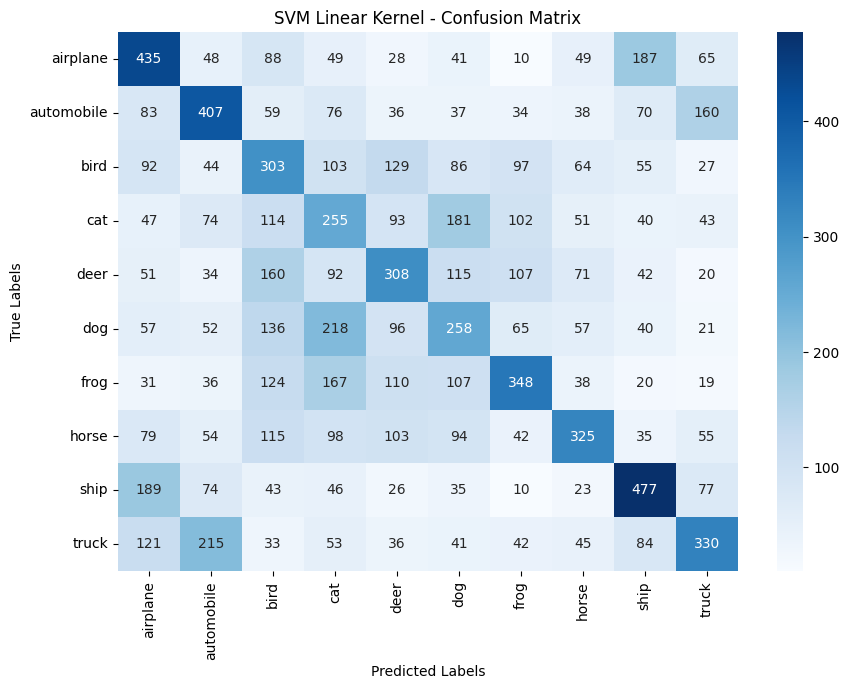

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Call the function with the necessary parameters
predict_svm_linear(x_train, y_train, x_test, y_test, subset_fraction=0.3, class_names=class_names)

SVM RBF Kernel - Time Taken: 1066.48 seconds
SVM RBF Kernel Accuracy: 49.45%
Predictions vs True Labels:
   True Label  Predicted Label
0           3                3
1           8                8
2           8                8
3           0                8
4           6                4


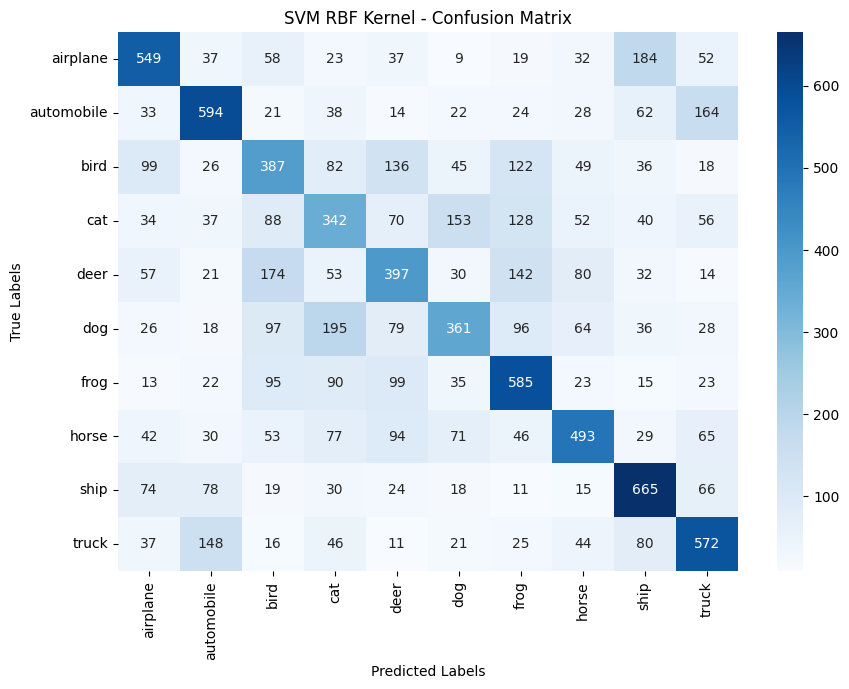

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Call the function with the necessary parameters
predict_svm_rbf(x_train, y_train, x_test, y_test, subset_fraction=0.3, class_names=class_names)

Gaussian Naive Bayes - Time Taken: 3.04 seconds
Gaussian Naive Bayes Accuracy: 29.39%
Predictions vs True Labels:
   True Label  Predicted Label
0           3                6
1           8                8
2           8                8
3           0                8
4           6                4


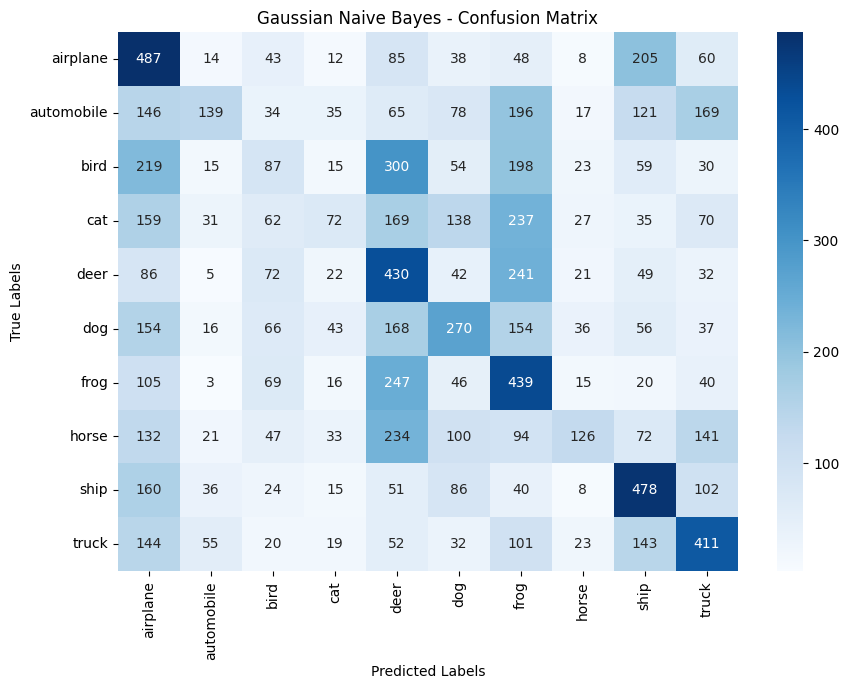

In [ ]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Call the function with the necessary parameters
predict_gaussian_nb(x_train, y_train, x_test, y_test, subset_fraction=0.3, class_names=class_names)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.2319 - loss: 2.1873 - val_accuracy: 0.3185 - val_loss: 1.9067
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.3413 - loss: 1.8315 - val_accuracy: 0.3724 - val_loss: 1.7475
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3772 - loss: 1.7238 - val_accuracy: 0.3807 - val_loss: 1.7340
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.4055 - loss: 1.6611 - val_accuracy: 0.3997 - val_loss: 1.6656
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.3975 - loss: 1.6559 - val_accuracy: 0.3953 - val_loss: 1.6628
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.4350 - loss: 1.5956 - val_accuracy: 0.3950 - val_loss: 1.7016
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.4374 - loss: 1.5697 - val_accuracy: 0.4363 - val_loss: 1.6149
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.4511 - loss: 1.527

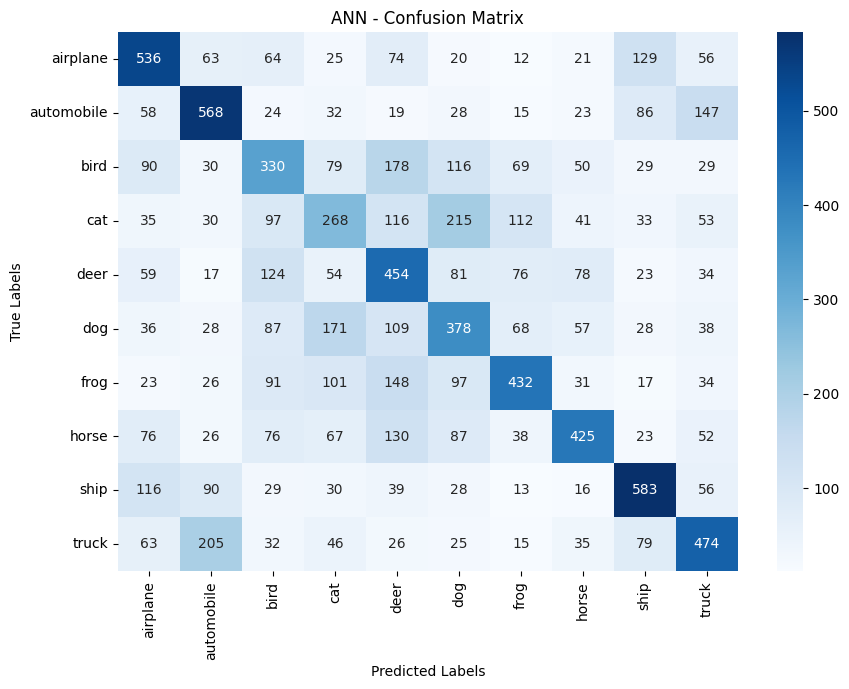

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Call the function with the necessary parameters
predict_ann_with_plot_subset(x_train, y_train, x_test, y_test, subset_fraction=0.3, class_names=class_names)


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function for K-Fold and Stratified K-Fold Cross-Validation
def k_fold_svm_linear_subset(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=None):
    # Shuffle and reduce training data to subset_fraction (30% in this case)
    np.random.seed(42)  # For reproducibility
    indices = np.random.permutation(x_train.shape[0])  # Shuffle indices
    subset_size = int(subset_fraction * x_train.shape[0])  # Calculate subset size
    subset_indices = indices[:subset_size]  # Select subset
    x_train = x_train[subset_indices]
    y_train = y_train[subset_indices]

    # Flatten the training data for SVM
    x_train_flat = x_train.reshape(x_train.shape[0], -1)
    y_train_flat = y_train.flatten()

    # Choose the cross-validation strategy
    if stratified:
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Stratified K-Fold Cross-Validation")
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Standard K-Fold Cross-Validation")

    accuracies = []
    fold = 1

    # Perform cross-validation
    for train_index, val_index in kf.split(x_train_flat, y_train_flat):
        print(f"\nFold {fold}:")
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train_flat[train_index], y_train_flat[val_index]

        # Train SVM with a linear kernel
        svm_linear = SVC(kernel='linear')
        svm_linear.fit(x_train_cv, y_train_cv)

        # Predict on validation set
        y_pred = svm_linear.predict(x_val_cv)

        # Compute accuracy
        accuracy = accuracy_score(y_val_cv, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy for Fold {fold}: {accuracy * 100:.2f}%")

        # Display the first 5 actual and predicted labels
        print("First 5 Actual Labels:   ", y_val_cv[:5])
        print("First 5 Predicted Labels:", y_pred[:5])

        # Generate and display confusion matrix for the current fold
        cm = confusion_matrix(y_val_cv, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names if class_names else range(len(cm)),
                    yticklabels=class_names if class_names else range(len(cm)))
        plt.title(f"Confusion Matrix for Fold {fold}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

        fold += 1

    # Summary of results
    mean_accuracy = np.mean(accuracies)
    std_dev = np.std(accuracies)
    print("\nCross-Validation Results:")
    print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
    print(f"Standard Deviation: {std_dev * 100:.2f}%")

    return mean_accuracy, std_dev


Using Stratified K-Fold Cross-Validation

Fold 1:
Accuracy for Fold 1: 35.07%
First 5 Actual Labels:    [4 3 9 3 3]
First 5 Predicted Labels: [6 1 1 3 8]


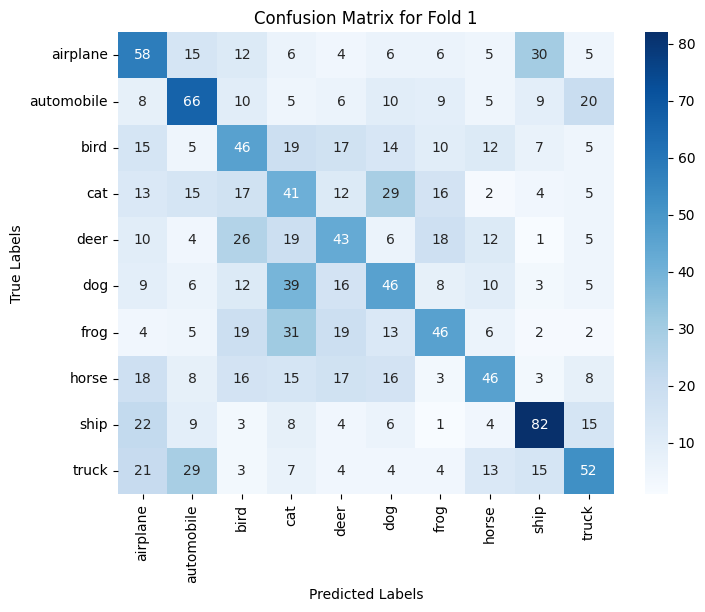


Fold 2:
Accuracy for Fold 2: 34.20%
First 5 Actual Labels:    [6 7 7 8 6]
First 5 Predicted Labels: [6 7 4 0 6]


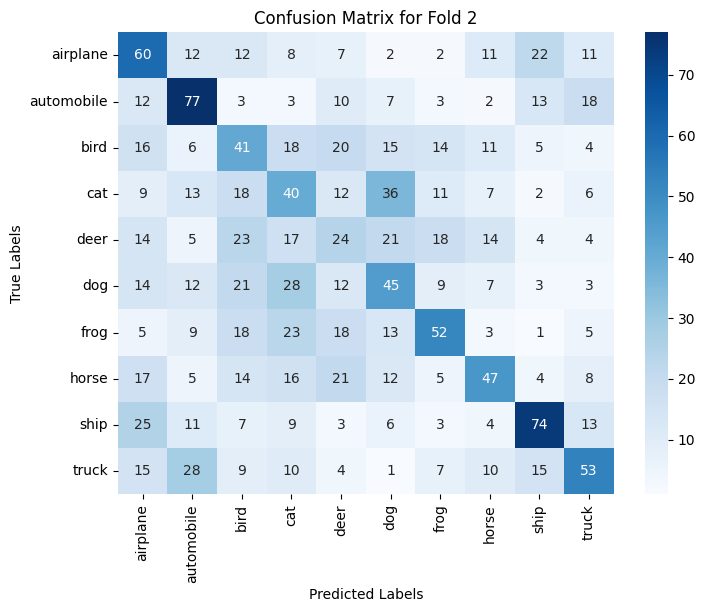


Fold 3:
Accuracy for Fold 3: 34.87%
First 5 Actual Labels:    [5 5 5 5 8]
First 5 Predicted Labels: [3 2 2 3 8]


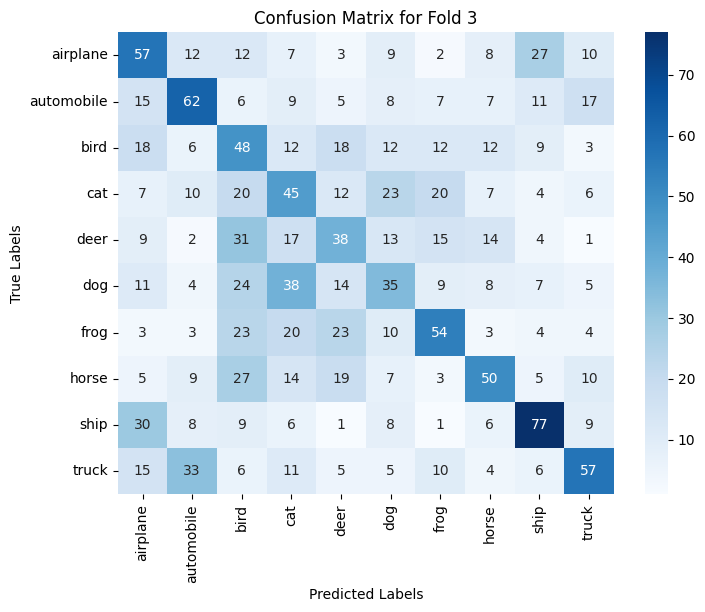


Fold 4:
Accuracy for Fold 4: 34.27%
First 5 Actual Labels:    [6 4 0 4 4]
First 5 Predicted Labels: [6 4 0 7 9]


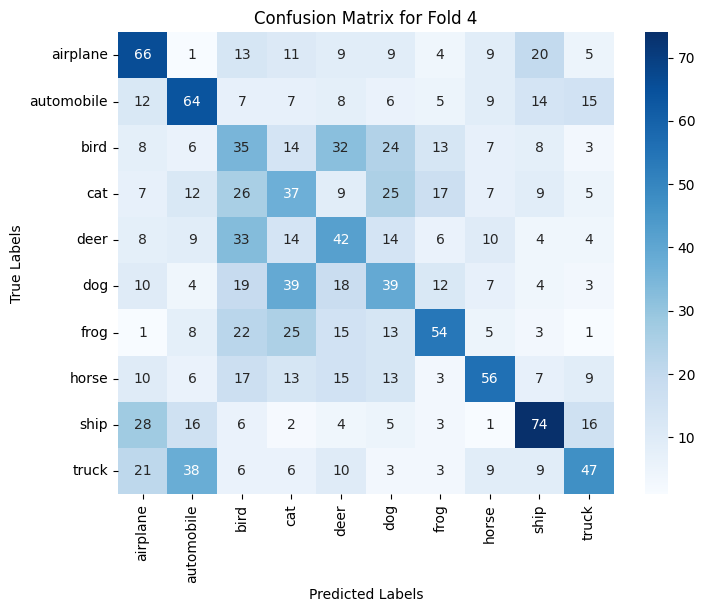


Fold 5:
Accuracy for Fold 5: 34.33%
First 5 Actual Labels:    [0 4 0 0 1]
First 5 Predicted Labels: [8 4 0 0 9]


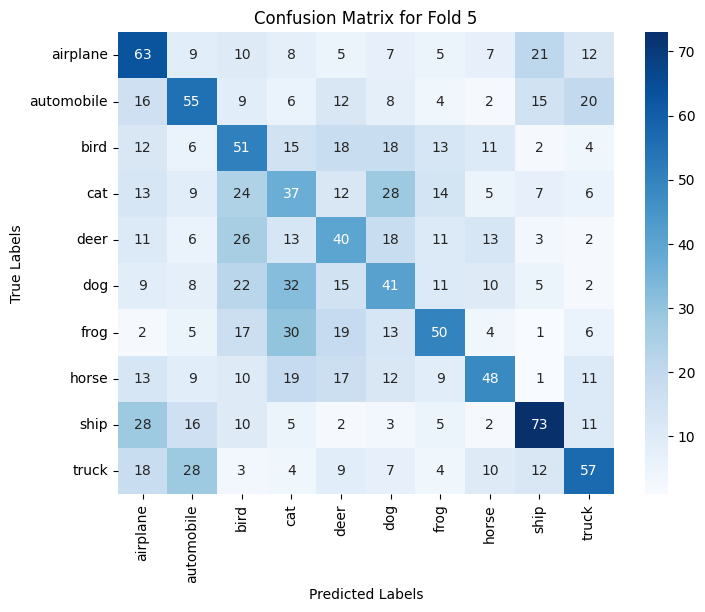


Fold 6:
Accuracy for Fold 6: 31.73%
First 5 Actual Labels:    [0 5 0 2 4]
First 5 Predicted Labels: [8 6 0 4 6]


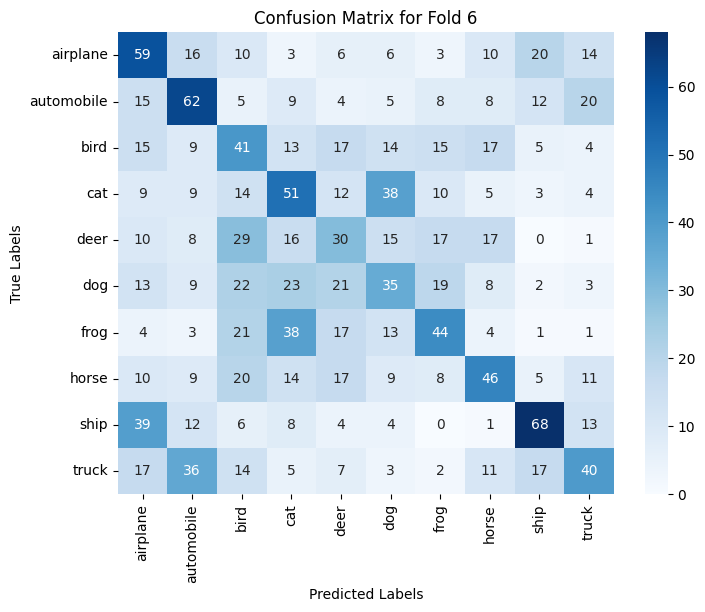


Fold 7:
Accuracy for Fold 7: 33.00%
First 5 Actual Labels:    [7 8 6 5 5]
First 5 Predicted Labels: [5 2 7 4 6]


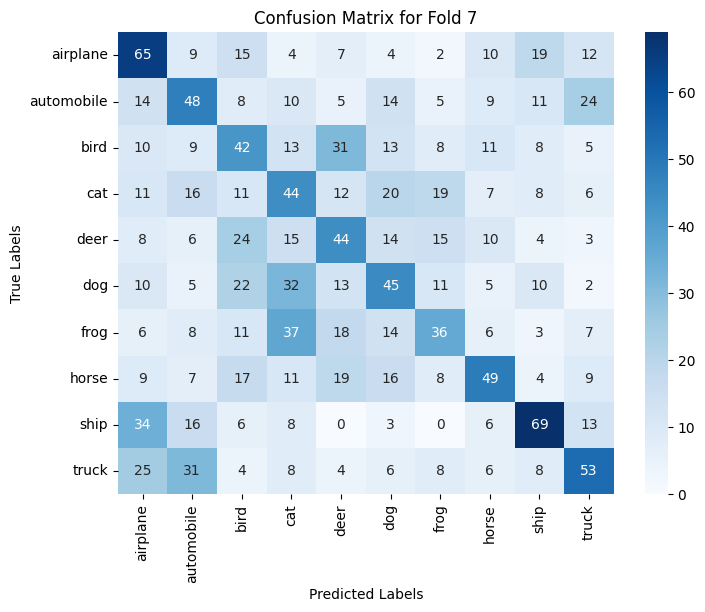


Fold 8:
Accuracy for Fold 8: 32.00%
First 5 Actual Labels:    [6 5 8 0 9]
First 5 Predicted Labels: [4 1 0 0 9]


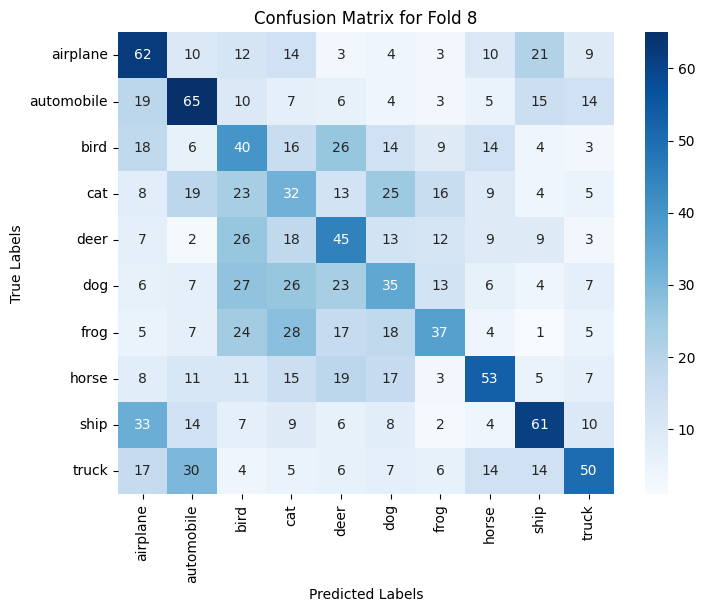


Fold 9:
Accuracy for Fold 9: 32.40%
First 5 Actual Labels:    [8 1 2 0 9]
First 5 Predicted Labels: [8 0 0 0 9]


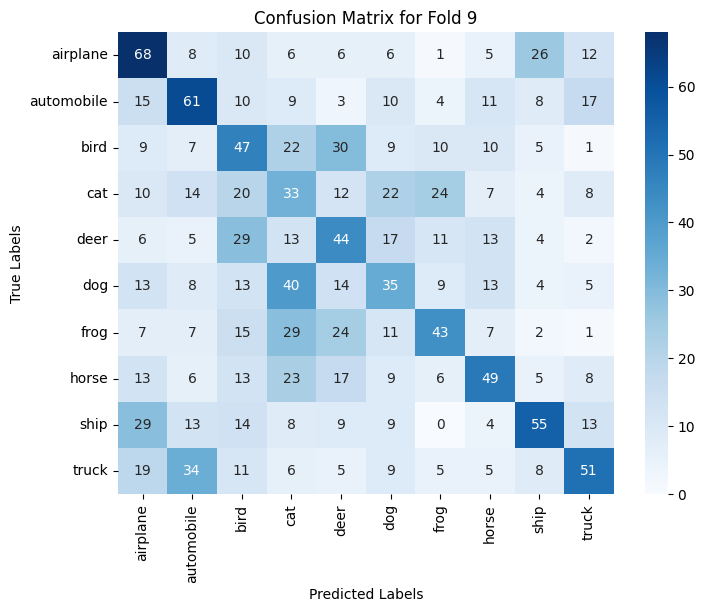


Fold 10:
Accuracy for Fold 10: 33.00%
First 5 Actual Labels:    [6 1 6 0 0]
First 5 Predicted Labels: [3 1 3 7 0]


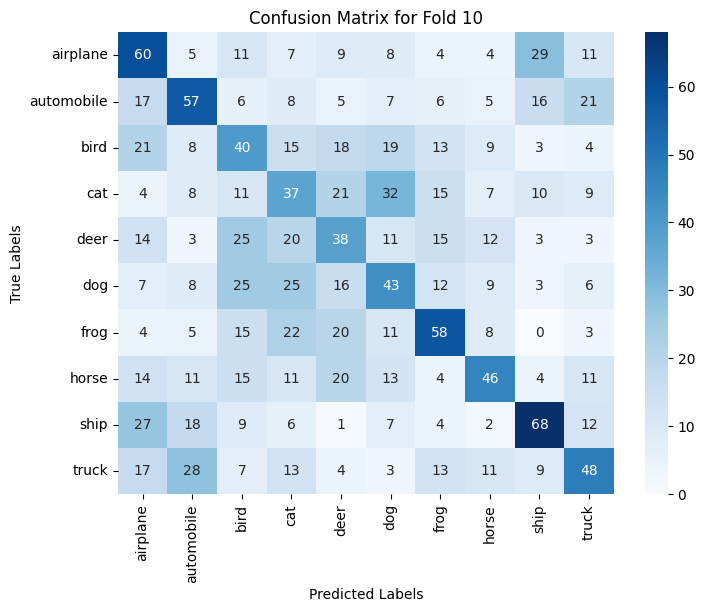


Cross-Validation Results:
Mean Accuracy: 33.49%
Standard Deviation: 1.15%


In [ ]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Perform Stratified K-Fold Cross-Validation with 30% of training data
mean_acc, std_dev = k_fold_svm_linear_subset(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=class_names)


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function for K-Fold and Stratified K-Fold Cross-Validation
def k_fold_svm_rbf_subset(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=None):
    # Shuffle and reduce training data to subset_fraction (30% in this case)
    np.random.seed(42)  # For reproducibility
    indices = np.random.permutation(x_train.shape[0])  # Shuffle indices
    subset_size = int(subset_fraction * x_train.shape[0])  # Calculate subset size
    subset_indices = indices[:subset_size]  # Select subset
    x_train = x_train[subset_indices]
    y_train = y_train[subset_indices]

    # Flatten the training data for SVM
    x_train_flat = x_train.reshape(x_train.shape[0], -1)
    y_train_flat = y_train.flatten()

    # Choose the cross-validation strategy
    if stratified:
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Stratified K-Fold Cross-Validation")
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Standard K-Fold Cross-Validation")

    accuracies = []
    fold = 1

    # Perform cross-validation
    for train_index, val_index in kf.split(x_train_flat, y_train_flat):
        print(f"\nFold {fold}:")
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train_flat[train_index], y_train_flat[val_index]

        # Train SVM with an RBF kernel
        svm_rbf = SVC(kernel='rbf')
        svm_rbf.fit(x_train_cv, y_train_cv)

        # Predict on validation set
        y_pred = svm_rbf.predict(x_val_cv)

        # Compute accuracy
        accuracy = accuracy_score(y_val_cv, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy for Fold {fold}: {accuracy * 100:.2f}%")

        # Display the first 5 actual and predicted labels
        print("First 5 Actual Labels:   ", y_val_cv[:5])
        print("First 5 Predicted Labels:", y_pred[:5])

        # Generate and display confusion matrix for the current fold
        cm = confusion_matrix(y_val_cv, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names if class_names else range(len(cm)),
                    yticklabels=class_names if class_names else range(len(cm)))
        plt.title(f"Confusion Matrix for Fold {fold}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

        fold += 1

    # Summary of results
    mean_accuracy = np.mean(accuracies)
    std_dev = np.std(accuracies)
    print("\nCross-Validation Results:")
    print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
    print(f"Standard Deviation: {std_dev * 100:.2f}%")

    return mean_accuracy, std_dev


Using Stratified K-Fold Cross-Validation

Fold 1:
Accuracy for Fold 1: 49.00%
First 5 Actual Labels:    [4 3 9 3 3]
First 5 Predicted Labels: [6 9 9 3 0]


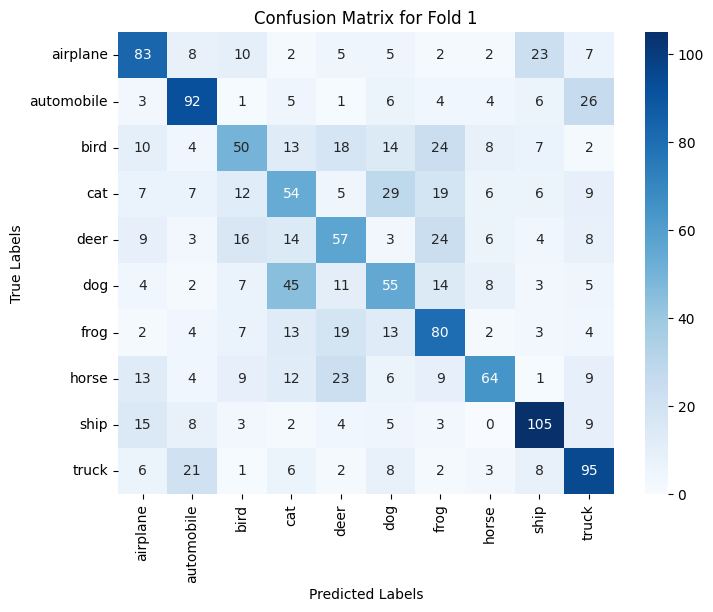


Fold 2:
Accuracy for Fold 2: 47.53%
First 5 Actual Labels:    [6 7 7 8 6]
First 5 Predicted Labels: [6 7 3 8 6]


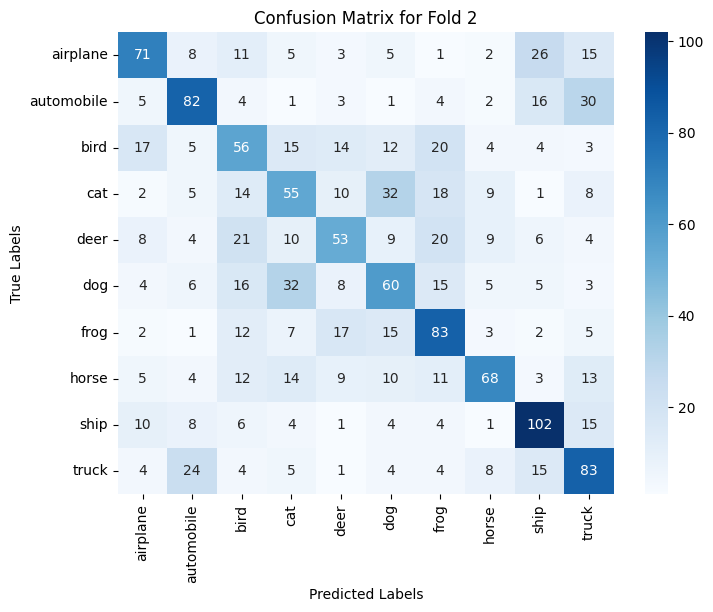


Fold 3:
Accuracy for Fold 3: 48.47%
First 5 Actual Labels:    [5 5 5 5 8]
First 5 Predicted Labels: [3 3 7 6 8]


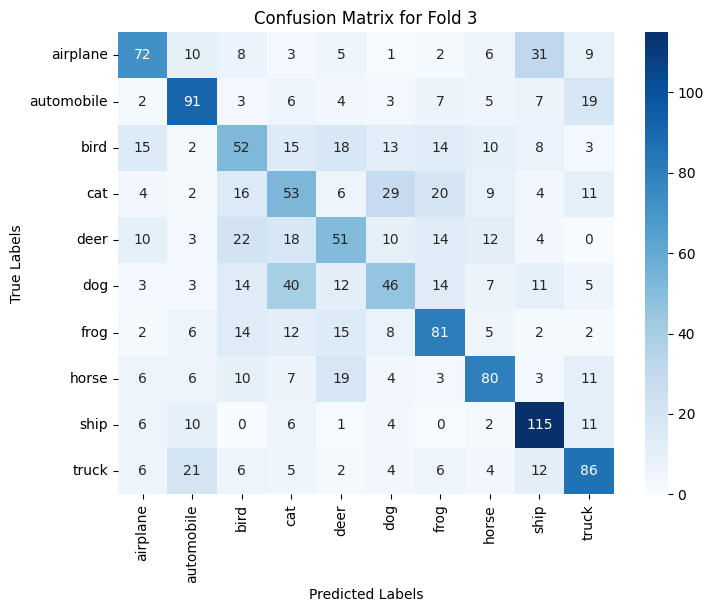


Fold 4:
Accuracy for Fold 4: 47.67%
First 5 Actual Labels:    [6 4 0 4 4]
First 5 Predicted Labels: [6 4 0 2 0]


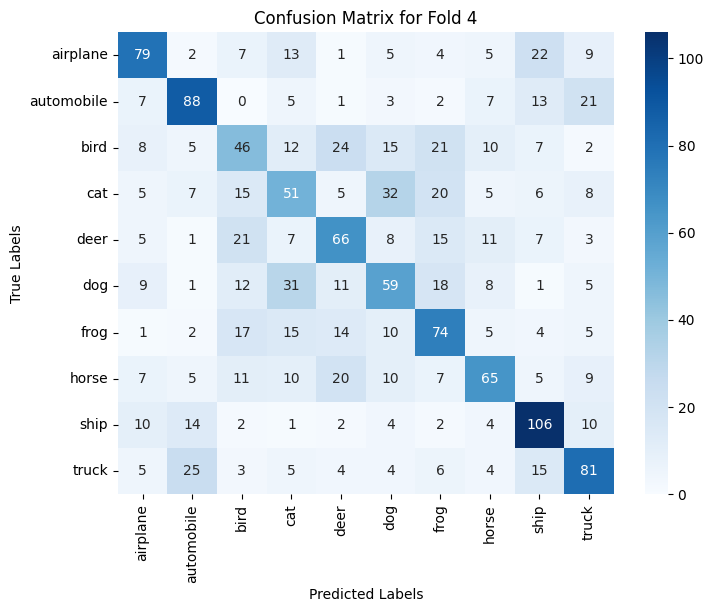


Fold 5:
Accuracy for Fold 5: 47.87%
First 5 Actual Labels:    [0 4 0 0 1]
First 5 Predicted Labels: [0 4 0 4 1]


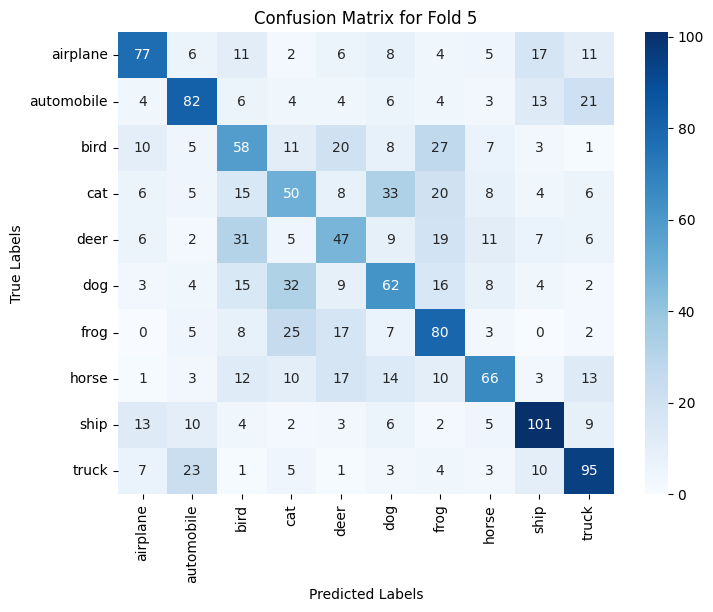


Fold 6:
Accuracy for Fold 6: 48.13%
First 5 Actual Labels:    [0 5 0 2 4]
First 5 Predicted Labels: [8 3 8 2 2]


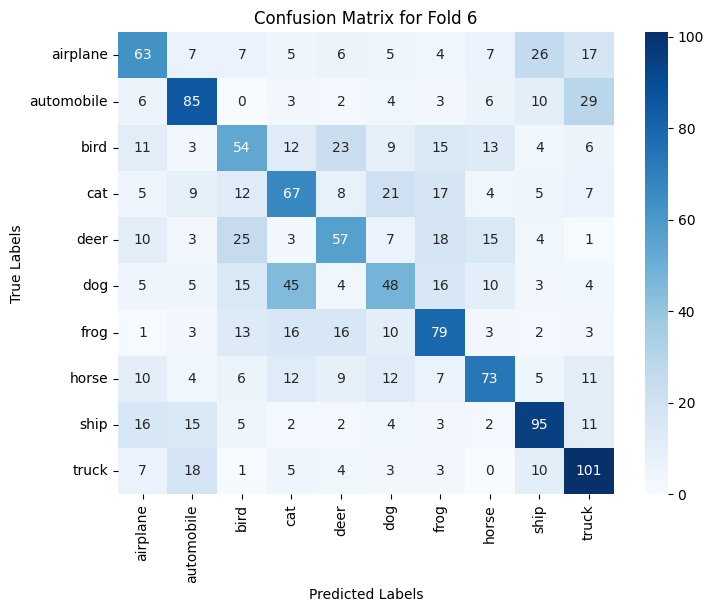


Fold 7:
Accuracy for Fold 7: 51.40%
First 5 Actual Labels:    [7 8 6 5 5]
First 5 Predicted Labels: [0 8 7 4 6]


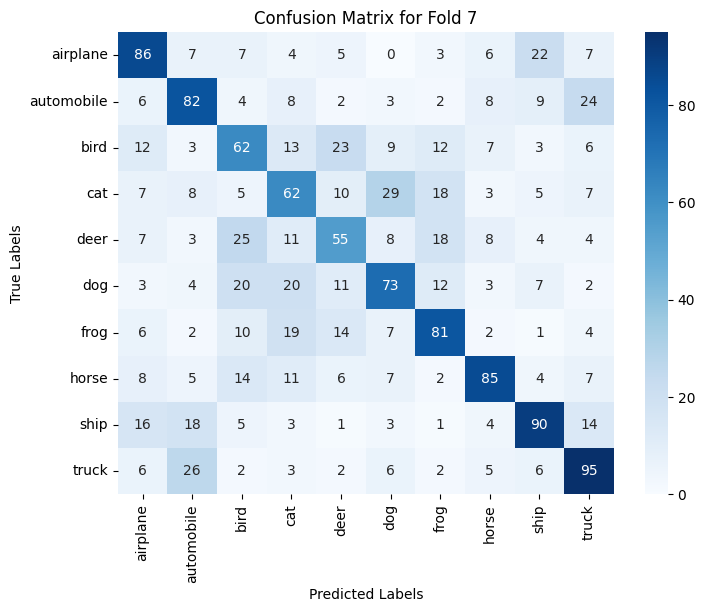


Fold 8:
Accuracy for Fold 8: 51.13%
First 5 Actual Labels:    [6 5 8 0 9]
First 5 Predicted Labels: [4 5 0 0 9]


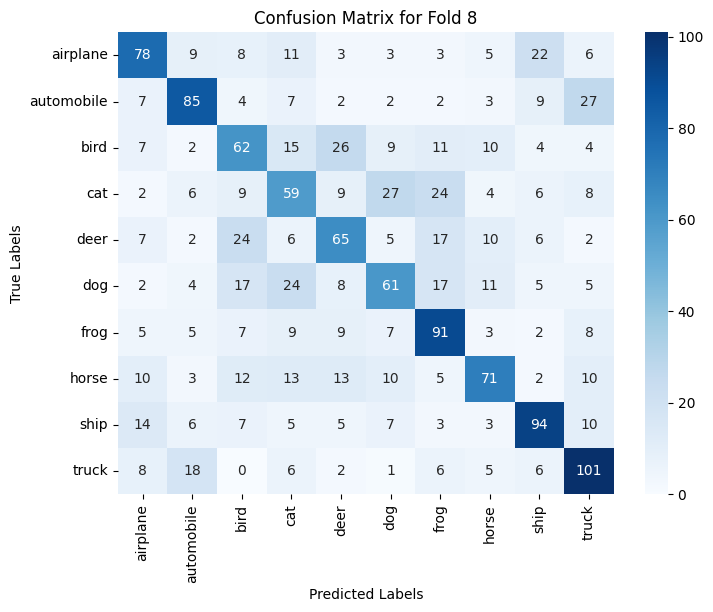


Fold 9:
Accuracy for Fold 9: 50.27%
First 5 Actual Labels:    [8 1 2 0 9]
First 5 Predicted Labels: [8 3 8 8 9]


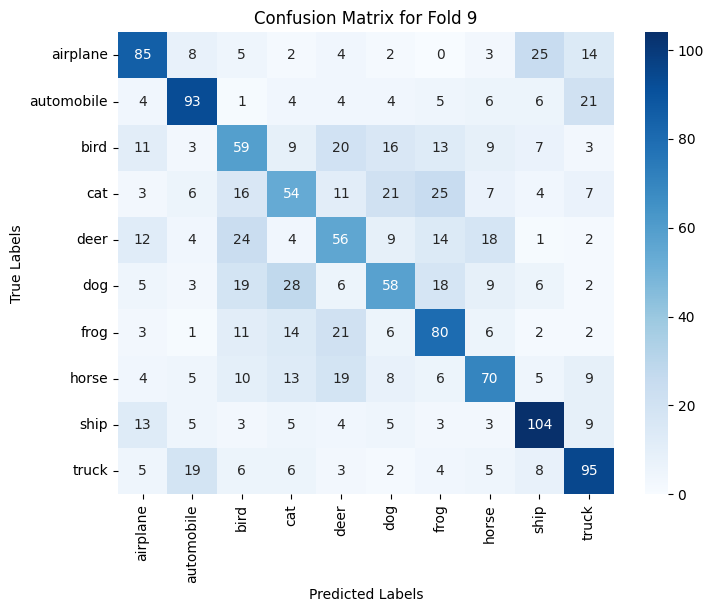


Fold 10:
Accuracy for Fold 10: 46.80%
First 5 Actual Labels:    [6 1 6 0 0]
First 5 Predicted Labels: [3 9 5 5 4]


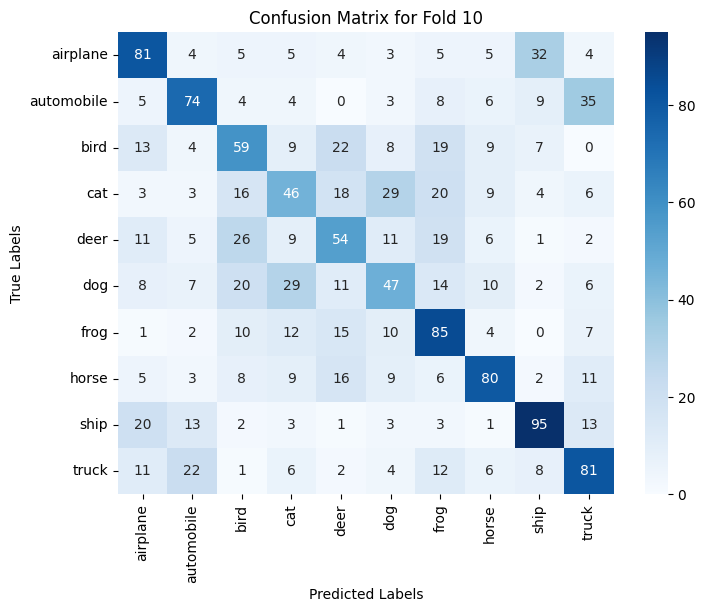


Cross-Validation Results:
Mean Accuracy: 48.83%
Standard Deviation: 1.51%


In [ ]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Example call with RBF kernel
mean_acc, std_dev = k_fold_svm_rbf_subset(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=class_names)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function for K-Fold Cross-Validation with Gaussian Naive Bayes
def k_fold_gnb_subset(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=None):
    # Shuffle and reduce training data to subset_fraction (30% in this case)
    np.random.seed(42)  # For reproducibility
    indices = np.random.permutation(x_train.shape[0])  # Shuffle indices
    subset_size = int(subset_fraction * x_train.shape[0])  # Calculate subset size
    subset_indices = indices[:subset_size]  # Select subset
    x_train = x_train[subset_indices]
    y_train = y_train[subset_indices]

    # Flatten the training data for GNB
    x_train_flat = x_train.reshape(x_train.shape[0], -1)
    y_train_flat = y_train.flatten()

    # Choose the cross-validation strategy
    if stratified:
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Stratified K-Fold Cross-Validation")
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Standard K-Fold Cross-Validation")

    accuracies = []
    fold = 1

    # Perform cross-validation
    for train_index, val_index in kf.split(x_train_flat, y_train_flat):
        print(f"\nFold {fold}:")
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train_flat[train_index], y_train_flat[val_index]

        # Train Gaussian Naive Bayes
        gnb = GaussianNB()
        gnb.fit(x_train_cv, y_train_cv)

        # Predict on validation set
        y_pred = gnb.predict(x_val_cv)

        # Compute accuracy
        accuracy = accuracy_score(y_val_cv, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy for Fold {fold}: {accuracy * 100:.2f}%")

        # Display the first 5 actual and predicted labels
        print("First 5 Actual Labels:   ", y_val_cv[:5])
        print("First 5 Predicted Labels:", y_pred[:5])

        # Generate and display confusion matrix for the current fold
        cm = confusion_matrix(y_val_cv, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names if class_names else range(len(cm)),
                    yticklabels=class_names if class_names else range(len(cm)))
        plt.title(f"Confusion Matrix for Fold {fold}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

        fold += 1

    # Summary of results
    mean_accuracy = np.mean(accuracies)
    std_dev = np.std(accuracies)
    print("\nCross-Validation Results:")
    print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
    print(f"Standard Deviation: {std_dev * 100:.2f}%")

    return mean_accuracy, std_dev


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Function for K-Fold Cross-Validation with ANN
def k_fold_ann_subset(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=None):
    # Shuffle and reduce training data to subset_fraction (30% in this case)
    np.random.seed(42)  # For reproducibility
    indices = np.random.permutation(x_train.shape[0])  # Shuffle indices
    subset_size = int(subset_fraction * x_train.shape[0])  # Calculate subset size
    subset_indices = indices[:subset_size]  # Select subset
    x_train = x_train[subset_indices]
    y_train = y_train[subset_indices]

    # Normalize and one-hot encode labels
    y_train_onehot = to_categorical(y_train, num_classes=10)

    # Choose the cross-validation strategy
    if stratified:
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Stratified K-Fold Cross-Validation")
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Standard K-Fold Cross-Validation")

    accuracies = []
    fold = 1

    # Perform cross-validation
    for train_index, val_index in kf.split(x_train, y_train):
        print(f"\nFold {fold}:")
        x_train_cv, x_val_cv = x_train[train_index], x_train[val_index]
        y_train_cv, y_val_cv = y_train_onehot[train_index], y_train[val_index]

        # Build ANN model
        model = Sequential([
            Flatten(input_shape=(x_train_cv.shape[1], x_train_cv.shape[2], x_train_cv.shape[3])),
            Dense(512, activation='relu'),
            Dense(256, activation='relu'),
            Dense(10, activation='softmax')
        ])

        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the ANN model
        model.fit(x_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)

        # Predict on validation set
        y_pred = np.argmax(model.predict(x_val_cv), axis=1)

        # Compute accuracy
        accuracy = accuracy_score(y_val_cv, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy for Fold {fold}: {accuracy * 100:.2f}%")

        # Display the first 5 actual and predicted labels
        print("First 5 Actual Labels:   ", y_val_cv[:5])
        print("First 5 Predicted Labels:", y_pred[:5])

        fold += 1

    # Summary of results
    mean_accuracy = np.mean(accuracies)
    std_dev = np.std(accuracies)
    print("\nCross-Validation Results:")
    print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
    print(f"Standard Deviation: {std_dev * 100:.2f}%")

    return mean_accuracy, std_dev


Using Stratified K-Fold Cross-Validation

Fold 1:
Accuracy for Fold 1: 27.00%
First 5 Actual Labels:    [4 3 9 3 3]
First 5 Predicted Labels: [4 9 0 6 0]


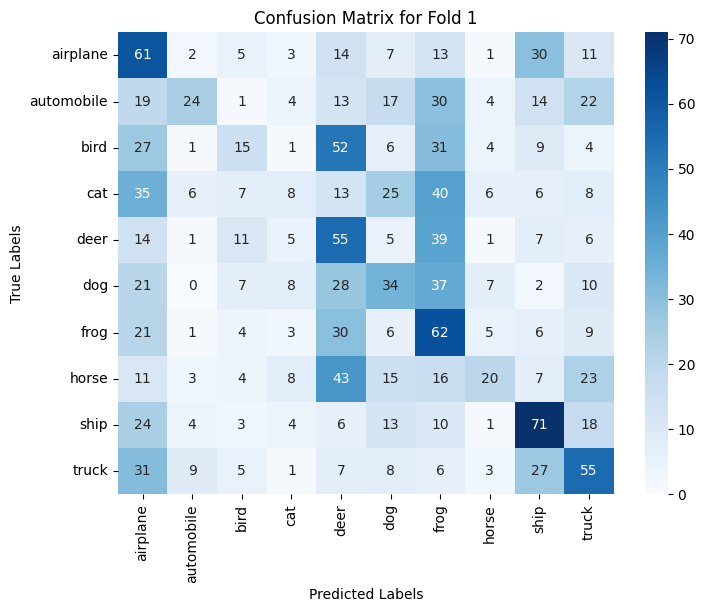


Fold 2:
Accuracy for Fold 2: 27.93%
First 5 Actual Labels:    [6 7 7 8 6]
First 5 Predicted Labels: [6 4 6 8 4]


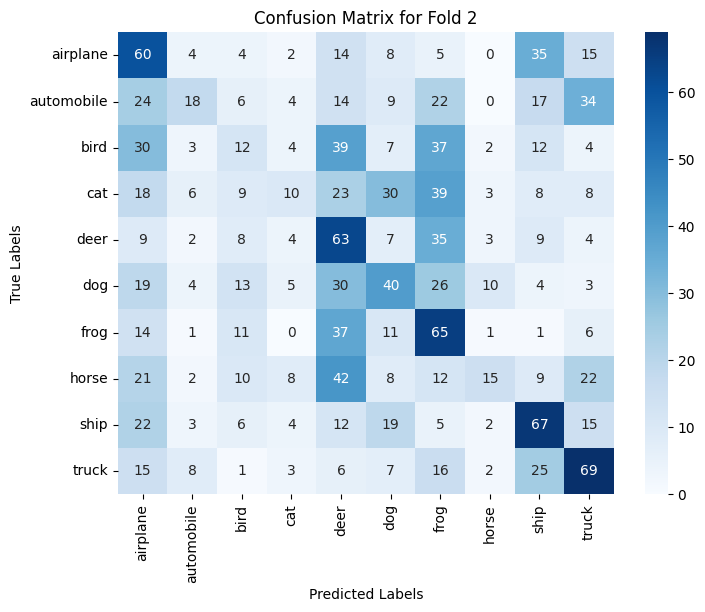


Fold 3:
Accuracy for Fold 3: 26.93%
First 5 Actual Labels:    [5 5 5 5 8]
First 5 Predicted Labels: [0 9 9 0 8]


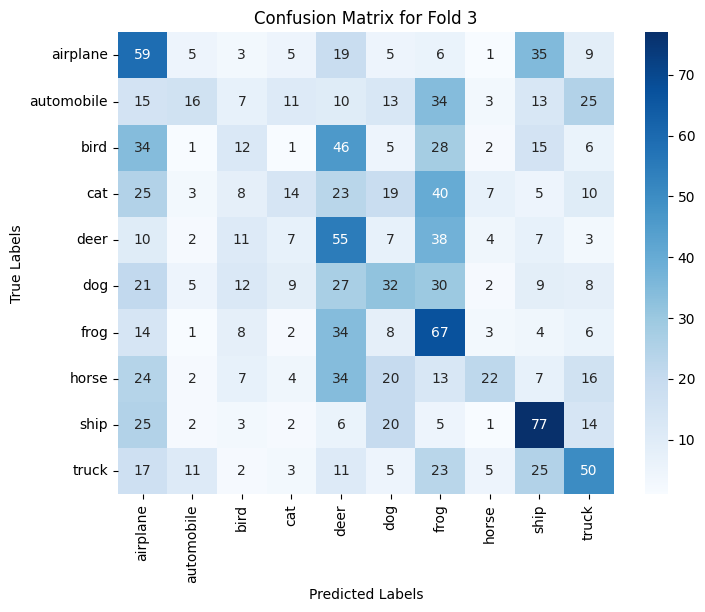


Fold 4:
Accuracy for Fold 4: 29.20%
First 5 Actual Labels:    [6 4 0 4 4]
First 5 Predicted Labels: [6 4 0 2 8]


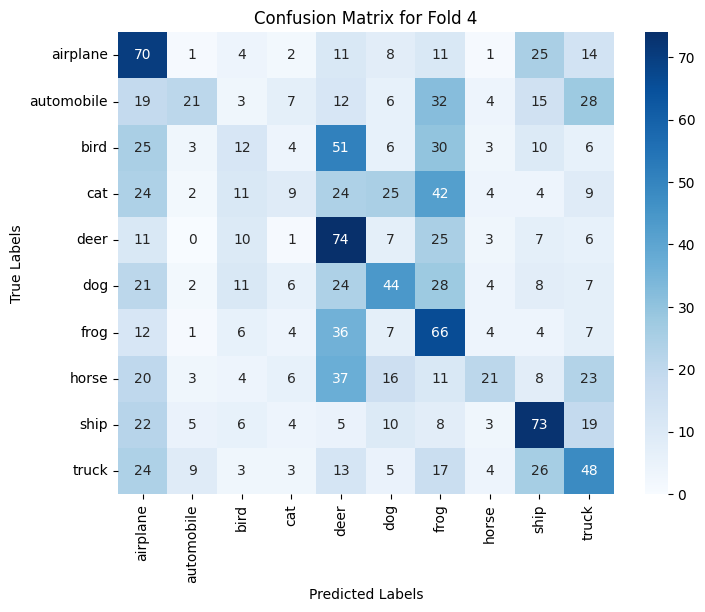


Fold 5:
Accuracy for Fold 5: 29.47%
First 5 Actual Labels:    [0 4 0 0 1]
First 5 Predicted Labels: [8 4 0 4 1]


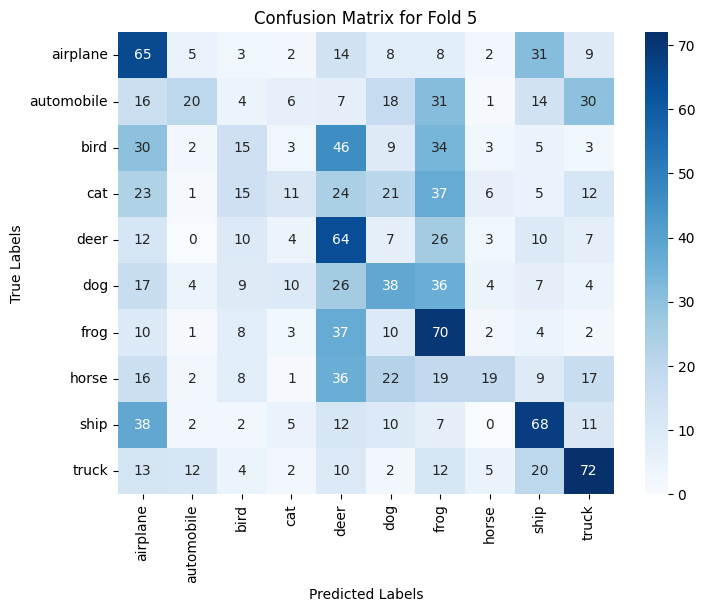


Fold 6:
Accuracy for Fold 6: 28.40%
First 5 Actual Labels:    [0 5 0 2 4]
First 5 Predicted Labels: [8 0 8 4 4]


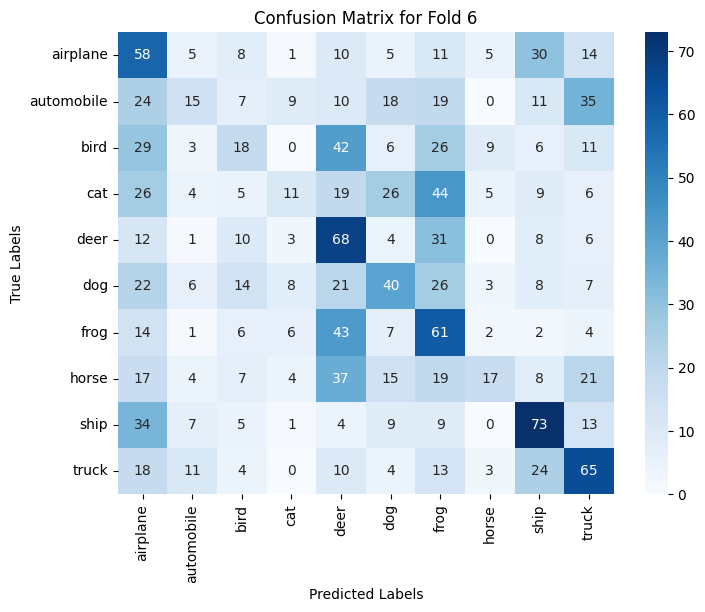


Fold 7:
Accuracy for Fold 7: 27.80%
First 5 Actual Labels:    [7 8 6 5 5]
First 5 Predicted Labels: [8 8 6 4 6]


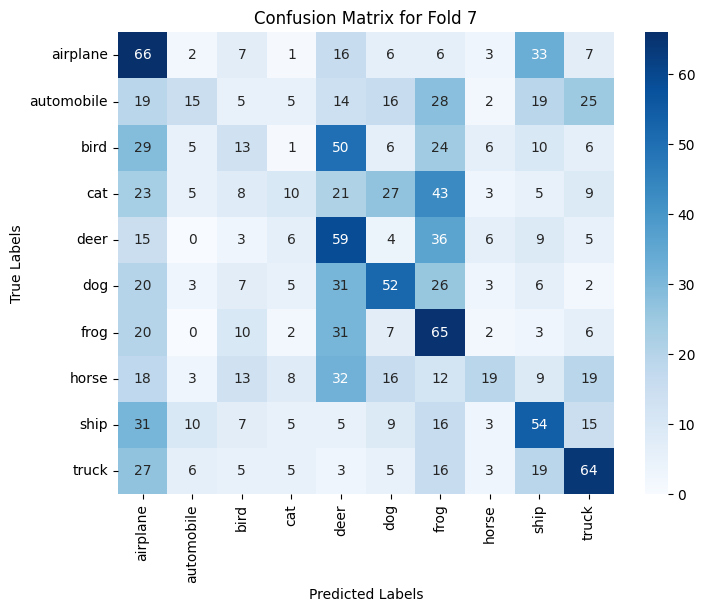


Fold 8:
Accuracy for Fold 8: 28.33%
First 5 Actual Labels:    [6 5 8 0 9]
First 5 Predicted Labels: [6 2 9 0 9]


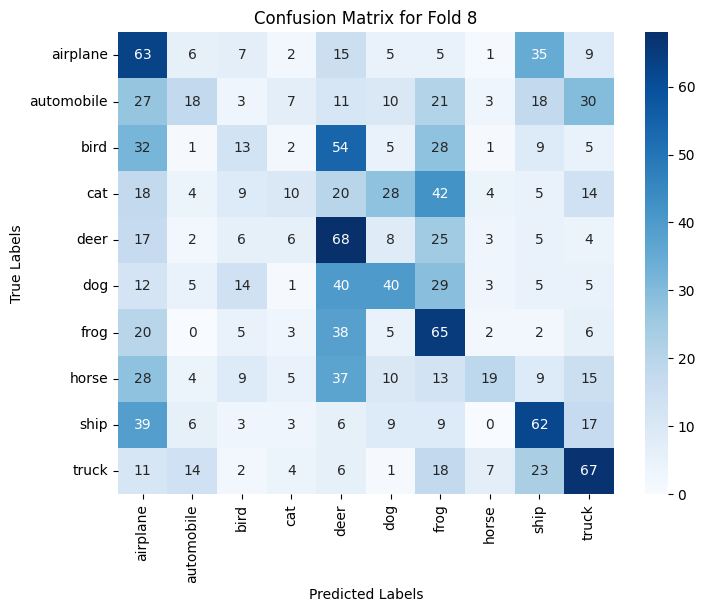


Fold 9:
Accuracy for Fold 9: 27.93%
First 5 Actual Labels:    [8 1 2 0 9]
First 5 Predicted Labels: [8 6 0 8 9]


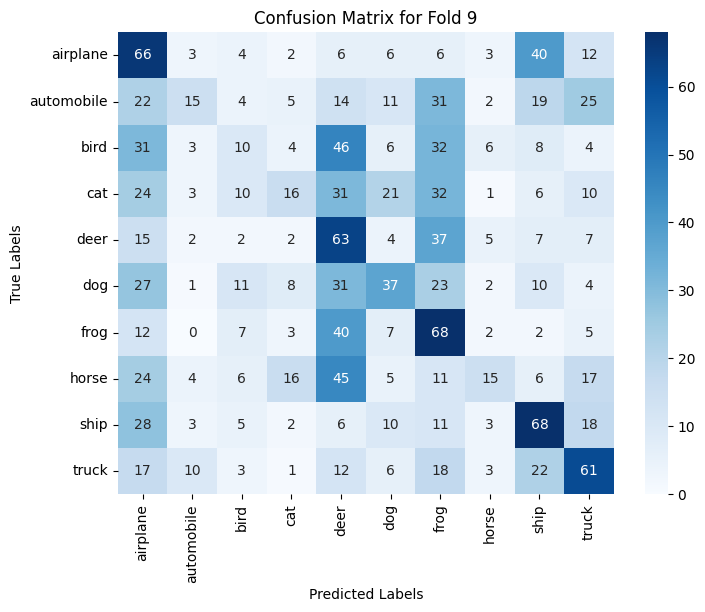


Fold 10:
Accuracy for Fold 10: 27.00%
First 5 Actual Labels:    [6 1 6 0 0]
First 5 Predicted Labels: [6 9 0 4 0]


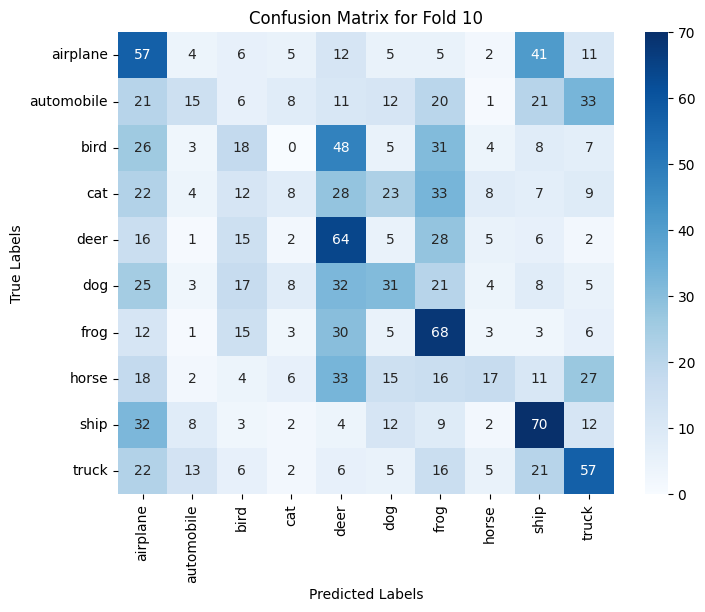


Cross-Validation Results:
Mean Accuracy: 28.00%
Standard Deviation: 0.84%


In [ ]:
mean_acc, std_dev = k_fold_gnb_subset(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=class_names)


In [ ]:
mean_acc, std_dev = k_fold_ann_subset(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=class_names)


Using Stratified K-Fold Cross-Validation

Fold 1:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 1: 41.67%
First 5 Actual Labels:    [[4]
 [3]
 [9]
 [3]
 [3]]
First 5 Predicted Labels: [6 9 1 5 0]

Fold 2:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy for Fold 2: 42.87%
First 5 Actual Labels:    [[6]
 [7]
 [7]
 [8]
 [6]]
First 5 Predicted Labels: [6 7 5 8 6]

Fold 3:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 3: 43.53%
First 5 Actual Labels:    [[5]
 [5]
 [5]
 [5]
 [8]]
First 5 Predicted Labels: [3 6 6 6 8]

Fold 4:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy for Fold 4: 43.60%
First 5 Actual Labels:    [[6]
 [4]
 [0]
 [4]
 [4]]
First 5 Predicted Labels: [6 4 2 3 9]

Fold 5:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 5: 40.87%
First 5 Actual Labels:    [[0]
 [4]
 [0]
 [0]
 [1]]
First 5 Predicted Labels: [8 6 0 4 1]

Fold 6:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 6: 40.67%
First 5 Actual Labels:    [[0]
 [5]
 [0]
 [2]
 [4]]
First 5 Predicted Labels: [8 6 8 4 2]

Fold 7:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 7: 39.80%
First 5 Actual Labels:    [[7]
 [8]
 [6]
 [5]
 [5]]
First 5 Predicted Labels: [0 8 7 4 4]

Fold 8:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 8: 45.60%
First 5 Actual Labels:    [[6]
 [5]
 [8]
 [0]
 [9]]
First 5 Predicted Labels: [4 5 0 0 9]

Fold 9:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 9: 41.80%
First 5 Actual Labels:    [[8]
 [1]
 [2]
 [0]
 [9]]
First 5 Predicted Labels: [8 3 8 8 9]

Fold 10:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 10: 42.93%
First 5 Actual Labels:    [[6]
 [1]
 [6]
 [0]
 [0]]
First 5 Predicted Labels: [5 9 5 7 7]

Cross-Validation Results:
Mean Accuracy: 42.33%
Standard Deviation: 1.63%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Function for K-Fold Cross-Validation with ANN
def k_fold_ann_with_graph(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=None):
    # Shuffle and reduce training data to subset_fraction (30% in this case)
    np.random.seed(42)  # For reproducibility
    indices = np.random.permutation(x_train.shape[0])  # Shuffle indices
    subset_size = int(subset_fraction * x_train.shape[0])  # Calculate subset size
    subset_indices = indices[:subset_size]  # Select subset
    x_train = x_train[subset_indices]
    y_train = y_train[subset_indices]

    # Normalize and one-hot encode labels
    y_train_onehot = to_categorical(y_train, num_classes=10)

    # Choose the cross-validation strategy
    if stratified:
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Stratified K-Fold Cross-Validation")
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        print("Using Standard K-Fold Cross-Validation")

    accuracies = []
    fold = 1

    # Perform cross-validation
    for train_index, val_index in kf.split(x_train, y_train):
        print(f"\nFold {fold}:")
        x_train_cv, x_val_cv = x_train[train_index], x_train[val_index]
        y_train_cv, y_val_cv = y_train_onehot[train_index], y_train[val_index]

        # Build ANN model
        model = Sequential([
            Flatten(input_shape=(x_train_cv.shape[1], x_train_cv.shape[2], x_train_cv.shape[3])),
            Dense(512, activation='relu'),
            Dense(256, activation='relu'),
            Dense(10, activation='softmax')
        ])

        model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the ANN model
        history = model.fit(x_train_cv, y_train_cv, epochs=100, batch_size=32, verbose=0, validation_data=(x_val_cv, to_categorical(y_val_cv, num_classes=10)))

        # Plot the training loss and validation loss
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f"Fold {fold} - Loss vs Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # Predict on validation set
        y_pred = np.argmax(model.predict(x_val_cv), axis=1)

        # Compute accuracy
        accuracy = accuracy_score(y_val_cv, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy for Fold {fold}: {accuracy * 100:.2f}%")

        # Display the first 5 actual and predicted labels
        print("First 5 Actual Labels:   ", y_val_cv[:5])
        print("First 5 Predicted Labels:", y_pred[:5])

        fold += 1

    # Summary of results
    mean_accuracy = np.mean(accuracies)
    std_dev = np.std(accuracies)
    print("\nCross-Validation Results:")
    print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
    print(f"Standard Deviation: {std_dev * 100:.2f}%")

    return mean_accuracy, std_dev


Using Stratified K-Fold Cross-Validation

Fold 1:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


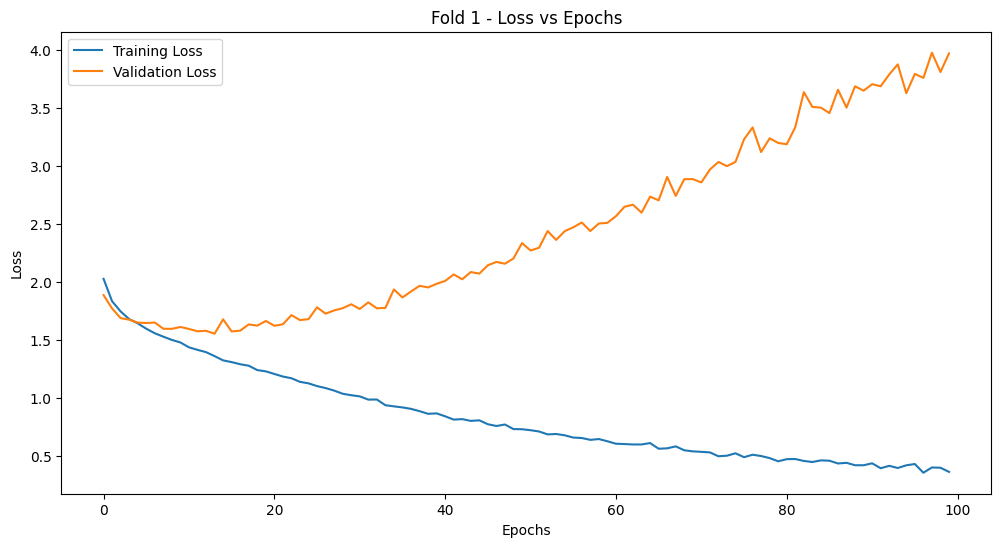

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Accuracy for Fold 1: 41.27%
First 5 Actual Labels:    [[4]
 [3]
 [9]
 [3]
 [3]]
First 5 Predicted Labels: [6 9 9 3 0]

Fold 2:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


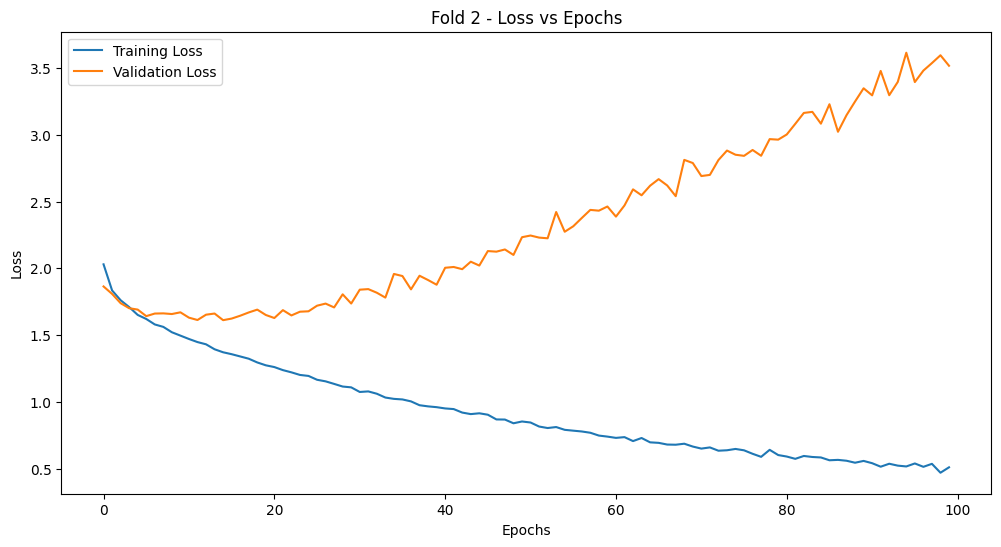

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 2: 40.47%
First 5 Actual Labels:    [[6]
 [7]
 [7]
 [8]
 [6]]
First 5 Predicted Labels: [6 7 3 8 6]

Fold 3:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


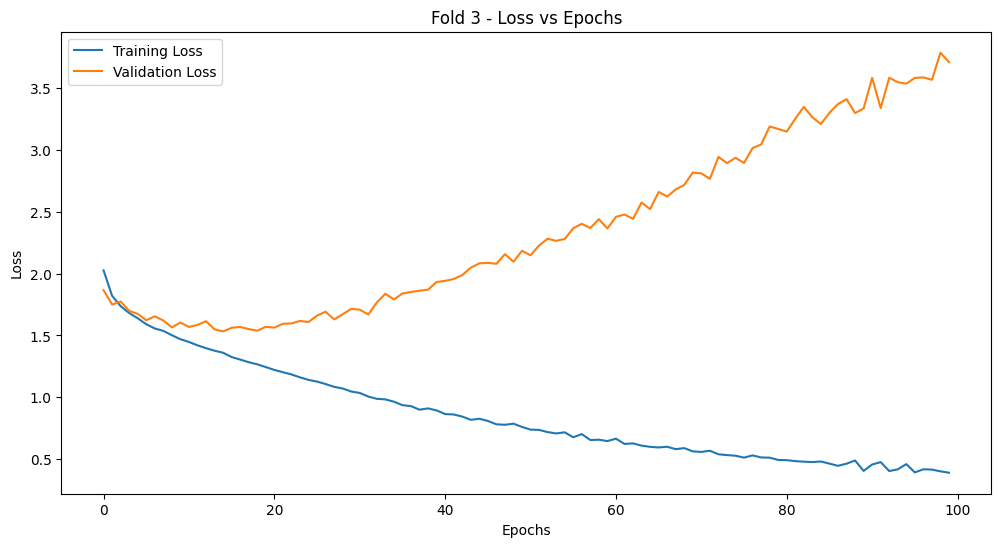

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 3: 43.47%
First 5 Actual Labels:    [[5]
 [5]
 [5]
 [5]
 [8]]
First 5 Predicted Labels: [3 5 6 6 8]

Fold 4:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


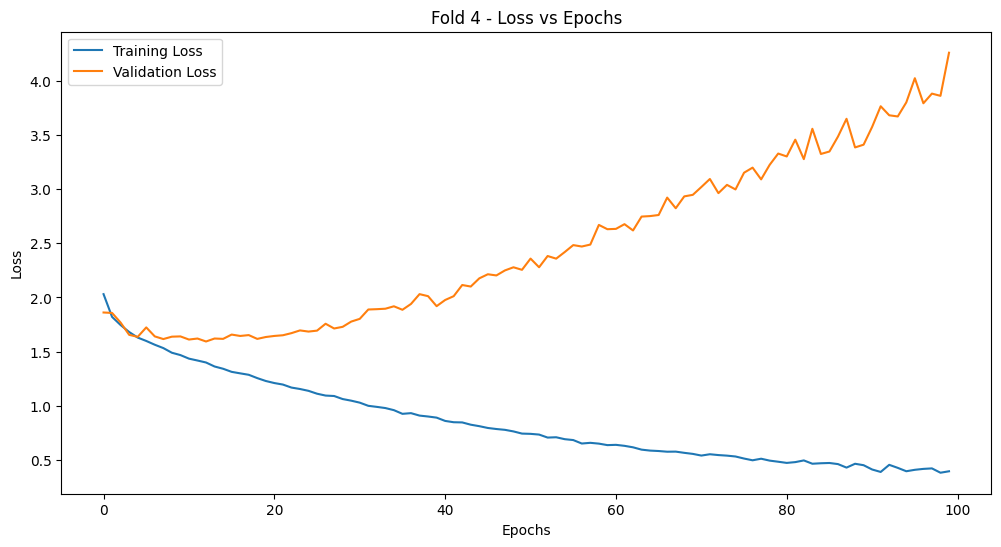

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 4: 42.87%
First 5 Actual Labels:    [[6]
 [4]
 [0]
 [4]
 [4]]
First 5 Predicted Labels: [6 4 0 8 9]

Fold 5:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


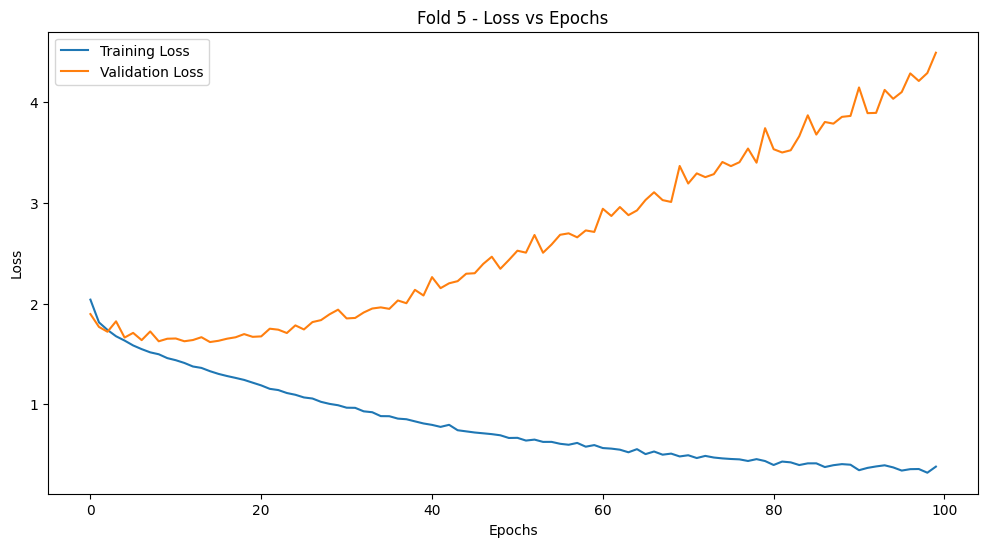

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy for Fold 5: 41.00%
First 5 Actual Labels:    [[0]
 [4]
 [0]
 [0]
 [1]]
First 5 Predicted Labels: [0 7 0 4 1]

Fold 6:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


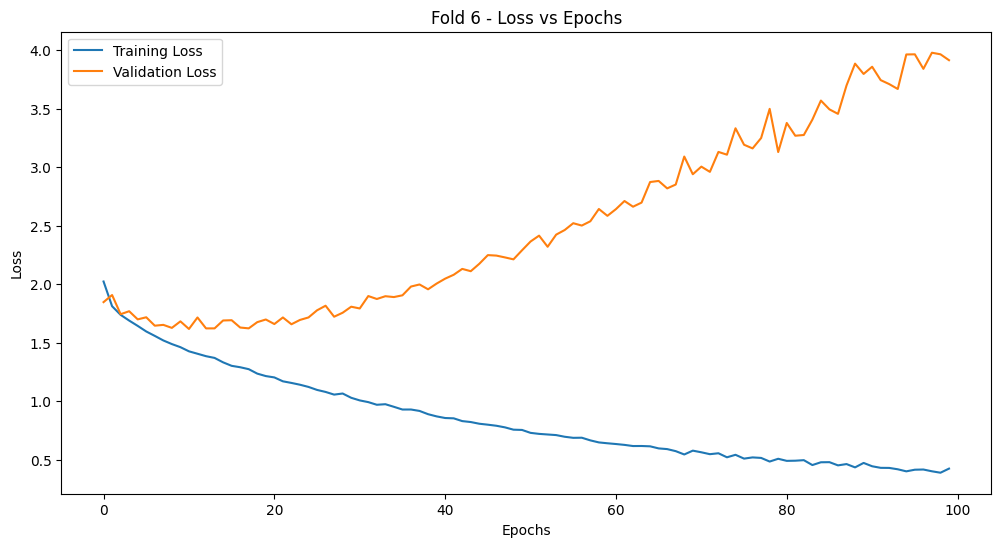

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy for Fold 6: 41.40%
First 5 Actual Labels:    [[0]
 [5]
 [0]
 [2]
 [4]]
First 5 Predicted Labels: [8 5 8 4 4]

Fold 7:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


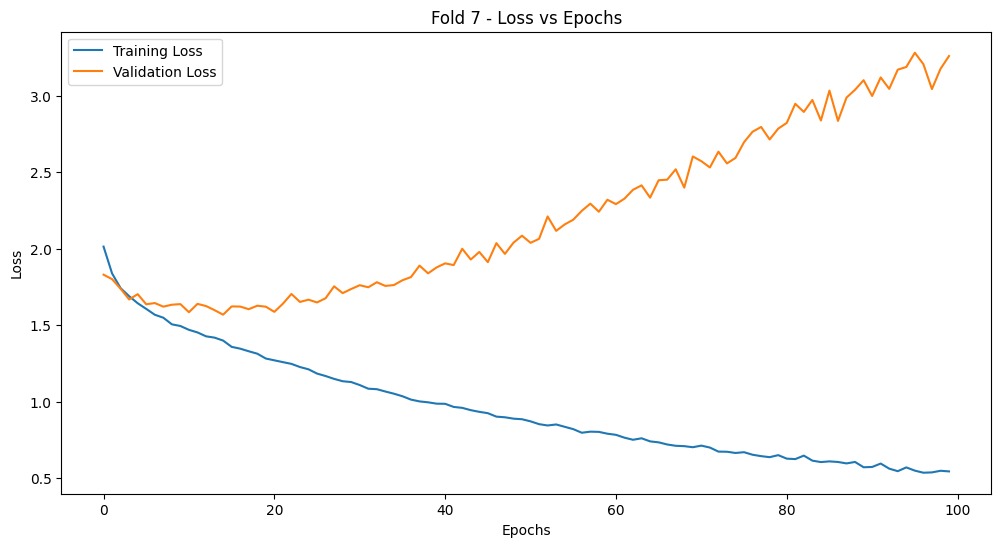

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy for Fold 7: 42.87%
First 5 Actual Labels:    [[7]
 [8]
 [6]
 [5]
 [5]]
First 5 Predicted Labels: [8 8 4 4 4]

Fold 8:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


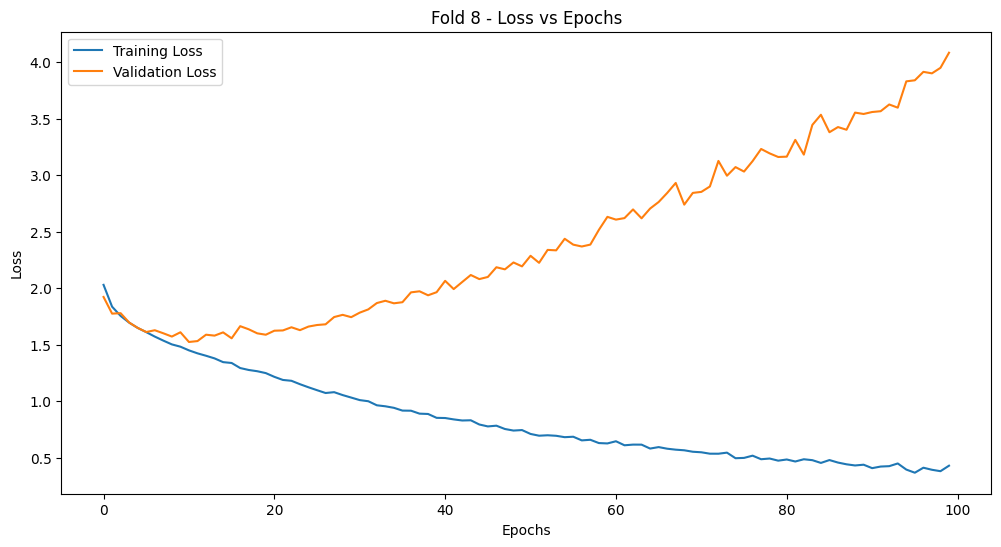

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy for Fold 8: 40.60%
First 5 Actual Labels:    [[6]
 [5]
 [8]
 [0]
 [9]]
First 5 Predicted Labels: [3 6 8 0 9]

Fold 9:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


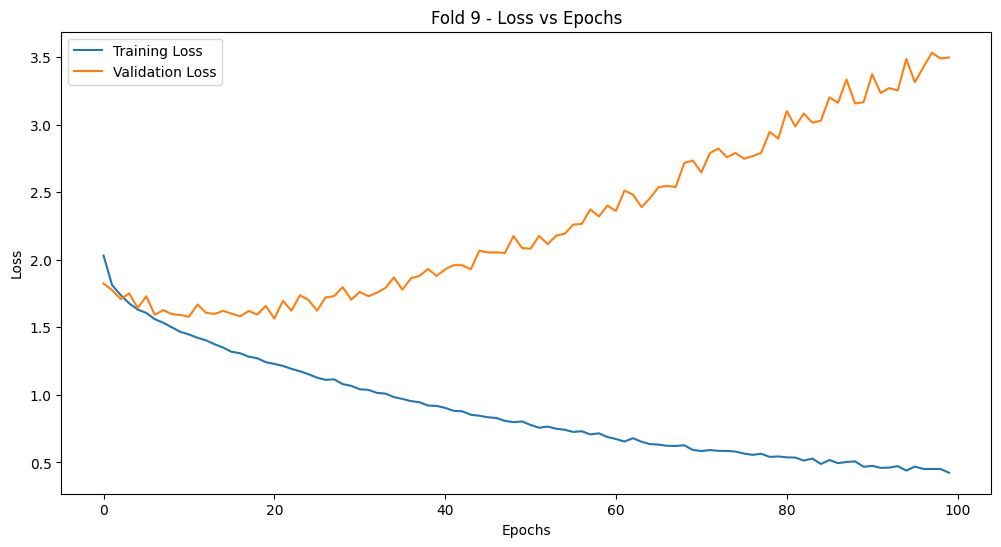

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy for Fold 9: 43.93%
First 5 Actual Labels:    [[8]
 [1]
 [2]
 [0]
 [9]]
First 5 Predicted Labels: [8 5 8 8 9]

Fold 10:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


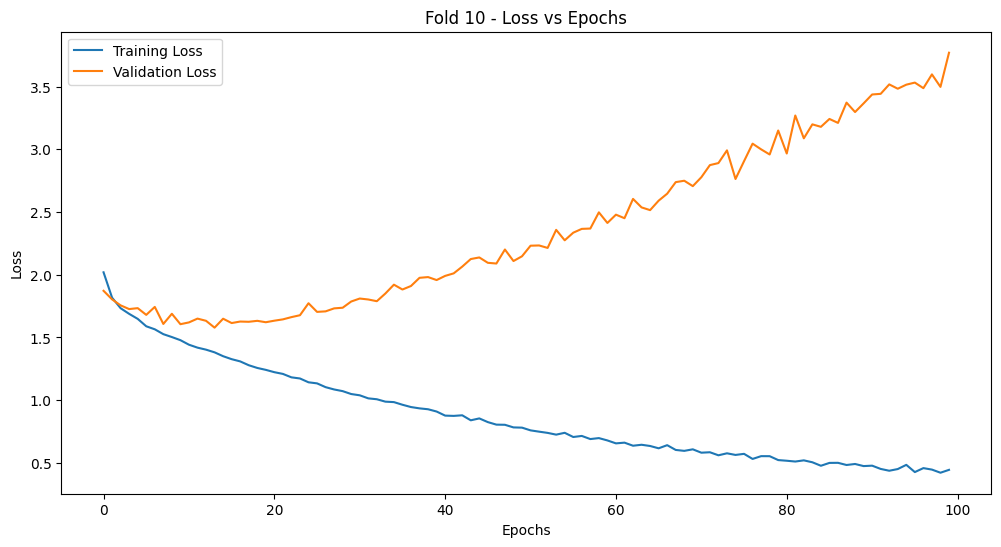

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy for Fold 10: 40.47%
First 5 Actual Labels:    [[6]
 [1]
 [6]
 [0]
 [0]]
First 5 Predicted Labels: [4 9 6 0 4]

Cross-Validation Results:
Mean Accuracy: 41.83%
Standard Deviation: 1.25%


In [ ]:
mean_acc, std_dev = k_fold_ann_with_graph(x_train, y_train, k=10, stratified=True, subset_fraction=0.3, class_names=class_names)
